<a href="https://colab.research.google.com/github/naomori/codexa_ImageRecognitionForBeginner/blob/master/Chapter4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 画像データ前処理

In [1]:
# データ処理のライブラリ
import numpy as np 
import pandas as pd

# データ可視化のライブラリ
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# 機械学習ライブラリ scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

MNISTデータは、Scikit-learn に同梱されており、sklearn.datasets モジュールからデータを読み込むことができます。  
[fetch_openml()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)関数の
第一引数にデータ・セット名を渡すと、データセットを取得できます。  
また、`return_X_y` 引数に `true`を設定すると、特徴量（X）とターゲット（y）へデータを切り分けて返してくれます。  
画像データの場合、特徴量はピクセル値であり、ターゲットは画像に付与されたラベル（MNISTの場合は数字0-9）です。

In [2]:
# MNIST データセットの読み込み
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


それぞれ、70,000 レコードが格納され、特徴量の列数は 784 あります。  
これは、MNIST の画像データが 28x28 なので、28x28 = 784 というわけです。

このデータを画像データに戻して表示してみます。   
784 のベクトル数列を reshape()メソッドを使って、28x28 の行列へ変換します。

In [4]:
# サンプルの抽出

sample_index = np.random.randint(0, len(X))
print(sample_index)
sample_index = 32343

test_number = X[sample_index]
test_number_image = test_number.reshape(28, 28)
print(test_number.shape)
print(test_number_image.shape)

69639
(784,)
(28, 28)


画像として表示する前に Pandas のデータフレームへ変換して値を確認してみます。  
表示されたデータフレームは、グレースケールの手書き数字画像を数列として変換したデータです。  
ピクセル値が大きい部分は黒で、0の部分は白を表します。  
本チャプターでは、これら数列のパターンを機械学習手法で解析し、
画像から手書き数字を認識することを目標としています。

In [5]:
# Numpy配列からPandasデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)

# 最大表示カラム数を設定
pd.options.display.max_columns = 28

# データフレームを表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,113.0,114.0,113.0,25.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,228.0,252.0,253.0,252.0,231.0,130.0,85.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,104.0,240.0,252.0,252.0,253.0,252.0,252.0,252.0,220.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,252.0,252.0,252.0,252.0,253.0,252.0,245.0,223.0,177.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,140.0,253.0,252.0,252.0,252.0,252.0,112.0,112.0,87.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,253.0,255.0,253.0,253.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


上記のデータフレームを Matplotlib を使って、ピクセル値から画像に変換します。  
MNIST の画像はグレースケールなので、cmap へ Matplotlib の cm.binary をカラーマップとして指定します。

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html

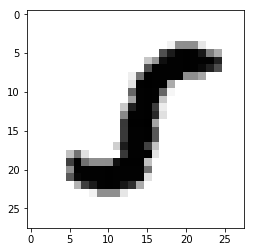

In [6]:
# Numpy配列から画像を表示
plt.imshow(test_number_image, cmap=matplotlib.cm.binary)
plt.show()

このラベルも確認してみます。

In [7]:
print(y[sample_index])

5


# 画像データの前処理：訓練セット・テストセットに分類

今回、訓練セット：テストセットの割合を 8:2 とします。

In [18]:
# 訓練/テストセットへ分割
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42) 

# サイズを確認
print(X_train.shape)
print(X_test.shape)

(56000, 784)
(14000, 784)


テキストでは、10,000 件に訓練データ・テストデータを縮小しています。

~~試しに全データを使ってトレーニングしてみたいと思いますので、
データセットを縮小しないでおきます。~~

In [20]:
# 訓練データの最初の1万件のみへ縮小
X_train = X_train[:10000]
y_train = y_train[:10000]

# テストデータの最初の1万件のみへ縮小
X_test = X_test[:10000]
y_test = y_test[:10000]

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(10000, 784)
(10000,)


In [0]:
訓練データとテストデータの分布を確認してみます。

In [22]:
# 訓練データのターゲットの分布
np.array(np.unique(y_train, return_counts=True)).astype(int).T

array([[   0, 1031],
       [   1, 1104],
       [   2, 1063],
       [   3, 1037],
       [   4,  933],
       [   5,  918],
       [   6,  968],
       [   7, 1047],
       [   8,  927],
       [   9,  972]])

In [23]:
# テストデータのターゲットの分布
np.array(np.unique(y_test, return_counts=True)).astype(int).T

array([[   0,  983],
       [   1, 1152],
       [   2,  967],
       [   3, 1034],
       [   4,  906],
       [   5,  937],
       [   6,  961],
       [   7, 1055],
       [   8,  969],
       [   9, 1036]])

# 画像データの正規化

危害学習における正規化（Normalization）とは、  
データを一定のルールに基づいて変更を加え、  
アルゴリズムや機械学習数法が処理しやすいような形に整形することです。

正規化を行う理由は利用する機械学習手法によって違います。  
例えば、最急降下法（Gradient Descent）の場合は、正規化を行うことで、
最適化に要する時間を大幅に短縮することができます。  
また、正規化手法も様々な手法があります。

本チャプターでは、最もシンプルな画像データの正規化を行います。  
その方法は、すべてのピクセル値について 255 で割ることで、0-1 の値に変換します。

In [24]:
# 正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255